In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yf
import seaborn as sb
import tensorflow
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot
import plotly.graph_objs as go
import plotly.offline as pyo



# 1. Gathering Data

In [2]:
def get_data(ticker, start_date, end_date, plot_data_price, plot_data_price_and_momento, plot_autocorrelations):
    yf.pdr_override()
    data = web.get_data_yahoo(ticker, start=start_date, end=end_date)
    data = pd.DataFrame(data)
    data = data_treatment(data)
    
    #Plots 
    if plot_data_price:
        plot_data(data, ticker)
    
    if plot_data_price_and_momento:
        plot_all_data(data, ticker)
    
    if plot_autocorrelations:
        plot_auto_correlation(data, ticker)
    
    return data
     
def plot_data(dataset, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataset.index, y=dataset['Adj Close'], mode='lines', name='Adjusted Close'))
    fig.update_layout(
        title=f'Adjusted Close Price {ticker}',
        xaxis_title='Date',
        yaxis_title='Adjusted Close Price',
        template='plotly_dark',  
        width=1500,  
        height=500   
    )
    fig.show()

def plot_all_data(dataset, ticker):
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=('Adjusted Close', 'Adj Close Momentum', 'Adj Close Momentum Acceleration'),
                    vertical_spacing=0.1)


    fig.add_trace(go.Scatter(x=dataset.index, y=dataset['Adj Close'],
                            mode='lines', name='Adjusted Close'),
                row=1, col=1)


    fig.add_trace(go.Scatter(x=dataset.index, y=dataset['Adj_Close_Momentum'],
                            mode='lines', name='Adjusted Close Momentum'),
                row=2, col=1)


    fig.add_trace(go.Scatter(x=dataset.index, y=dataset['Adj_Close_Momentum_Acceleration'],
                            mode='lines', name='Adjusted Close Momentum Acceleration'),
                row=3, col=1)


    fig.update_layout(
        title=f'Adjusted Close and Its Differences {ticker}',
        xaxis_title='Date',
        yaxis_title='Value',
        template='plotly_dark',
        height=800,  
        showlegend=False 
    )
    fig.show()

def plot_auto_correlation(dataset, ticker):
    ax = plt.figure(figsize=(20,4))
    ax.suptitle(f"Autocorrelation {ticker}")
    ax = autocorrelation_plot(dataset['Adj Close'])
    ax.grid(True, linestyle='-', alpha=0.8)
    
    ax = plt.figure(figsize=(20,4))
    ax.suptitle(f"Autocorrelation {ticker}")
    ax = autocorrelation_plot(dataset['Adj_Close_Momentum'])
    ax.grid(True, linestyle='-', alpha=0.8)

    ax = plt.figure(figsize=(20,4))
    ax.suptitle(f"Autocorrelation {ticker}")
    ax = autocorrelation_plot(dataset['Adj_Close_Momentum_Acceleration'])
    ax.grid(True, linestyle='-', alpha=0.8)

def data_treatment(dataset):
    dataset['Adj_Close_Momentum'] = dataset['Adj Close'].diff() 
    dataset['Adj_Close_Momentum_Acceleration'] = dataset['Adj_Close_Momentum'].diff()
    dataset = dataset.dropna()
    return dataset


[*********************100%%**********************]  1 of 1 completed


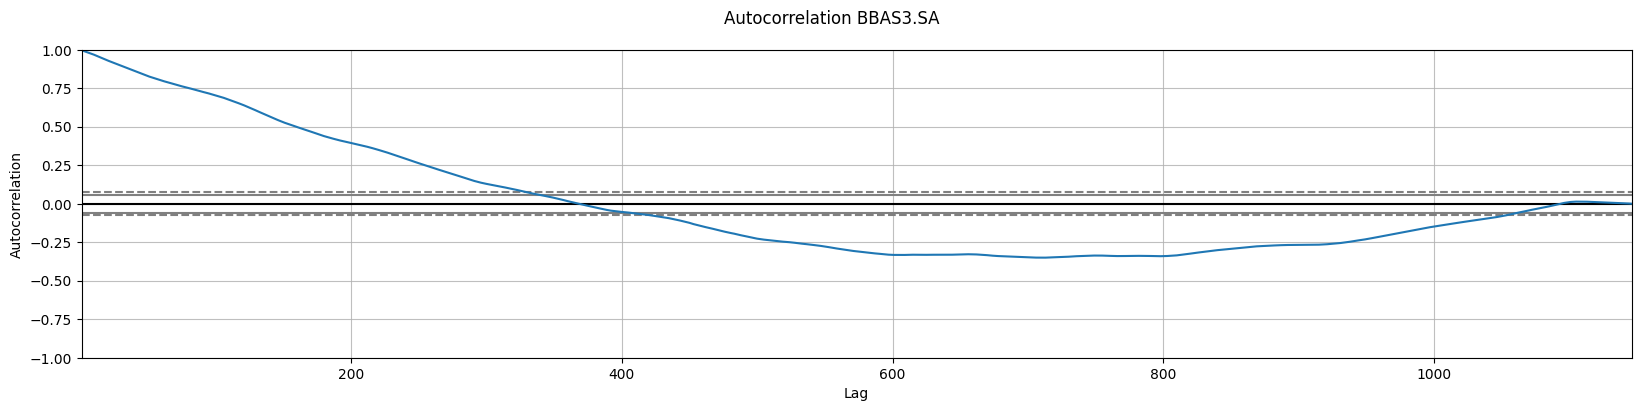

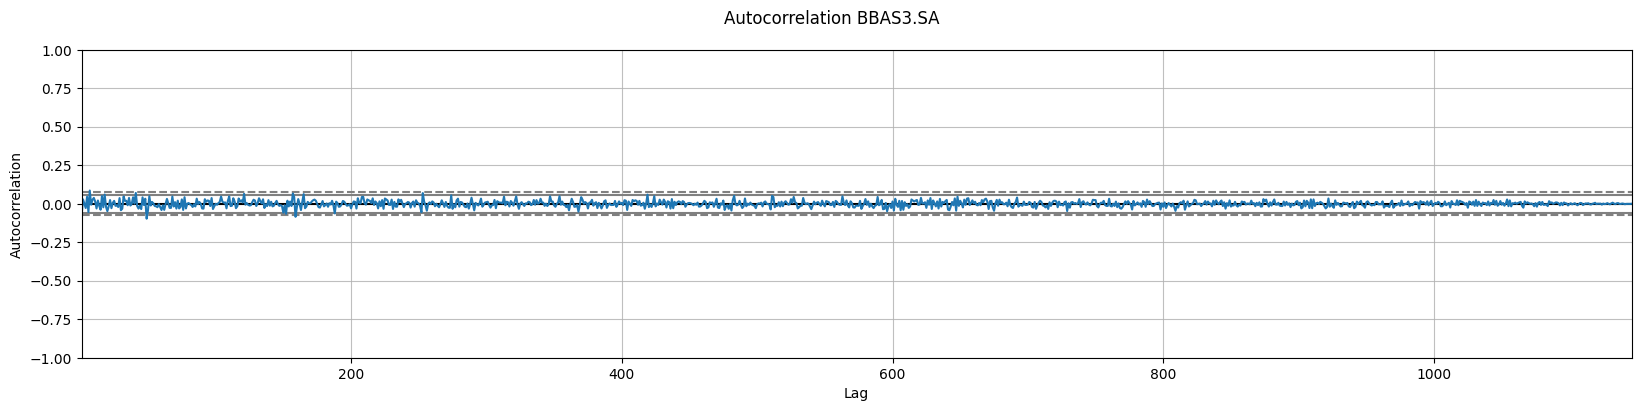

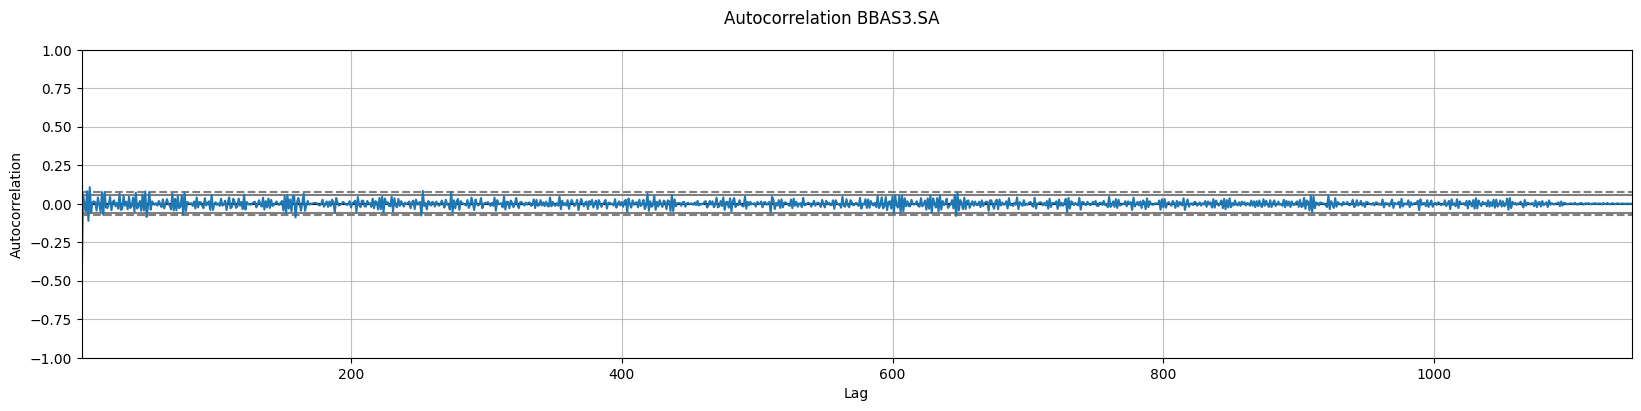

In [65]:
tickers = ["BBAS3.SA"]
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

data = get_data(tickers[0], start_date=start_date, end_date=end_date, plot_data_price=False, plot_data_price_and_momento=True, plot_autocorrelations=True)

# 2. Features

## 2.1. Lag features

In [56]:
data['adj_close_1'] = data[['Adj Close']].shift(1)
data['adj_close_2'] = data[['Adj Close']].shift(2)
data['adj_close_3'] = data[['Adj Close']].shift(3)
data['adj_close_4'] = data[['Adj Close']].shift(4)
data['adj_close_5'] = data[['Adj Close']].shift(5)
data['adj_close_6'] = data[['Adj Close']].shift(6)
data['adj_close_7'] = data[['Adj Close']].shift(7)
data['adj_close_8'] = data[['Adj Close']].shift(8)
data['adj_close_9'] = data[['Adj Close']].shift(9)
data['adj_close_10'] = data[['Adj Close']].shift(10)

data_features = data[['Adj Close', 'adj_close_1', 'adj_close_2', 'adj_close_3', 'adj_close_4', 'adj_close_5', 'adj_close_6', 'adj_close_7', 'adj_close_8', 'adj_close_9', 'adj_close_10']].dropna()
data_features

,Adj Close,adj_close_1,adj_close_2,adj_close_3,adj_close_4,adj_close_5,adj_close_6,adj_close_7,adj_close_8,adj_close_9,adj_close_10
Date,,,,,,,,,,,
2020-01-20,18.485472,18.604259,18.355560,18.273893,18.615398,18.715614,18.507746,18.953180,19.346647,19.524822,19.673302
2020-01-21,17.950958,18.485472,18.604259,18.355560,18.273893,18.615398,18.715614,18.507746,18.953180,19.346647,19.524822
2020-01-22,18.092012,17.950958,18.485472,18.604259,18.355560,18.273893,18.615398,18.715614,18.507746,18.953180,19.346647
2020-01-23,19.109081,18.092012,17.950958,18.485472,18.604259,18.355560,18.273893,18.615398,18.715614,18.507746,18.953180
2020-01-24,18.856670,19.109081,18.092012,17.950958,18.485472,18.604259,18.355560,18.273893,18.615398,18.715614,18.507746
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06,26.650000,26.200001,26.160000,26.370001,26.549999,26.950001,27.160000,27.120001,26.889999,26.870001,26.980000
2024-08-07,26.299999,26.650000,26.200001,26.160000,26.370001,26.549999,26.950001,27.160000,27.120001,26.889999,26.870001
2024-08-08,26.190001,26.299999,26.650000,26.200001,26.160000,26.370001,26.549999,26.950001,27.160000,27.120001,26.889999


In [57]:
X = data_features.drop(columns='Adj Close')
y = data_features['Adj Close']

# 3. Model

## 3.1. Model for lag features

In [58]:
splitlimit_test = int(len(X) * 0.9)

X_train, X_test = X[:splitlimit_test],  X[splitlimit_test:]
y_train, y_test = y[:splitlimit_test],  y[splitlimit_test:]

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 10), (114, 10), (1022, 1), (114, 1))

In [59]:
#Keeping the X_test ranges inside the X_train ranges
X_train.max().max().round(2), X_train.min().max().round(2), X_test.max().max().round(2), X_test.min().max().round(2), 

(28.76, 8.33, 28.69, 26.08)

In [52]:
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from tensorflow.keras import layers

import tensorflow as tf
import keras
from keras.callbacks import History
from keras.layers import LSTM, Input, Activation, concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization

In [60]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [61]:
# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train_np)
y_train_scaled = scaler_y.fit_transform(y_train_np)
X_test_scaled = scaler_X.transform(X_test_np)
y_test_scaled = scaler_y.fit_transform(y_test_np)

# Reshape X_train for LSTM model: [samples, time steps, features]
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

X_train_scaled.shape, y_train_scaled.shape, X_test_scaled.shape, y_test.shape

((1022, 1, 10), (1022, 1), (114, 1, 10), (114, 1))

In [62]:
# Define the model
model = Sequential()

# First LSTM layer with tanh activation, Dropout, and BatchNormalization
model.add(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second GRU layer with tanh activation, Dropout, and BatchNormalization
model.add(GRU(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third LSTM layer with tanh activation, Dropout, and BatchNormalization
model.add(LSTM(units=32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Fully connected Dense layers
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, batch_size=1, epochs=50)

Epoch 1/50


c:\Users\z004s8rp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1127
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0534
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0513
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0505
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0524
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0505
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0455
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0531
Epoch 9/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0517
Epoch 10/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0529
Epoch 11/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0512
Epoch 12/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0532
Epoch 13/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0532
Epoch 14/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0511
Epoch 15/50
1022/1022 ━━━━━━━━━━━━━━━━━━

# 4. Results

In [63]:
# Predicting on training data itself for simplicity, though typically you'd predict on a separate test set
predictions = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions)

# Convert predictions back to a DataFrame for easy comparison with original data
predictions_df = pd.DataFrame(predictions, index=y_test.index, columns=['Predicted_Adj_Close'])
predictions_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


,Predicted_Adj_Close
Date,
2024-03-01,-0.675024
2024-03-04,-1.984924
2024-03-05,0.345318
2024-03-06,1.830028
2024-03-07,1.782040
...,...
2024-08-06,8.683908
2024-08-07,7.918357
2024-08-08,7.062729


In [64]:
# Gráfico com Plotly
trace_real = go.Scatter(x=y_train.index, y=y_train['Adj Close'], mode='lines', name='Real Adj Close')
trace_real_test = go.Scatter(x=y_test.index, y=y_test['Adj Close'], mode='lines', name='Real Adj Close1')

trace_predicted = go.Scatter(x=predictions_df.index, y=predictions_df['Predicted_Adj_Close'], mode='lines', name='Predicted Adj Close')


layout = go.Layout(title='Stock Price Prediction', xaxis={'title': 'Date'}, yaxis={'title': 'Adj Close Price'})
fig = go.Figure(data=[trace_real, trace_real_test, trace_predicted], layout=layout)
fig.update_layout(
    template='plotly_dark',
    height=500,  
    showlegend=False) 
# Exibir o gráfico
pyo.iplot(fig)